In [ ]:
#importing libraries and packages
import pandas as pd
import math

In [ ]:
df = pd.read_csv("sample_nb.csv")
df

,Sl,Age,Income,Student,Credit Rating,Buys Computer
0,1,35,Medium,Yes,Fair,Yes
1,2,30,High,No,Average,No
2,3,40,Low,Yes,Good,No
3,4,35,Medium,No,Fair,Yes
4,5,45,Low,No,Fair,Yes
5,6,35,High,No,Excellent,Yes
6,7,35,Medium,No,Good,No
7,8,25,Low,No,Good,Yes
8,9,28,High,No,Average,No
9,10,35,Medium,Yes,Average,Yes


In [ ]:
def prior(c):
  class_counts = df[c].value_counts()
  n_samples = df.shape[0]
  priors = class_counts / n_samples
  return priors

In [ ]:
p_buysComputer= prior('Buys Computer')
print(p_buysComputer['Yes'])
print(p_buysComputer['No'])

0.6
0.4


In [ ]:
# Need to determine whether a person will buy a computer or not if age is below 30, income is medium, person is student and credit rating is fair

In [ ]:
def age_group(age):
    if age < 30:
        return 'Age<30'
    elif age >= 30 and age < 40:
        return 'Age:30-40'
    else:
        return 'Age>40'
def income_group(income):
  if income == 'Medium':
    return 'M_Income'
  elif income == 'High':
    return 'H_Income'
  elif income == 'Low':
    return 'L_Income'

def student_group(student):
  if student == 'Yes':
    return 'Is Student'
  elif student == 'No':
    return 'No Student'

def credit_rating_group(cr):
  if cr == 'Fair':
    return 'Fair CR'
  elif cr == 'Good':
    return 'Good CR'
  elif cr == 'Excellent':
    return 'Excellent CR'
def bc_group(bc):
  if bc == 'Yes':
    return 'Buy Computer'
  elif bc == 'No':
    return 'Not Buys Computer'


df['Income'] = df['Income'].apply(income_group)
df['Student'] = df['Student'].apply(student_group)
df['Credit Rating'] = df['Credit Rating'].apply(credit_rating_group)
df['Buys Computer'] = df['Buys Computer'].apply(bc_group)
df['Age'] = df['Age'].apply(age_group)
df

,Sl,Age,Income,Student,Credit Rating,Buys Computer
0,1,Age:30-40,M_Income,Is Student,Fair CR,Buy Computer
1,2,Age:30-40,H_Income,No Student,None,Not Buys Computer
2,3,Age>40,L_Income,Is Student,Good CR,Not Buys Computer
3,4,Age:30-40,M_Income,No Student,Fair CR,Buy Computer
4,5,Age>40,L_Income,No Student,Fair CR,Buy Computer
5,6,Age:30-40,H_Income,No Student,Excellent CR,Buy Computer
6,7,Age:30-40,M_Income,No Student,Good CR,Not Buys Computer
7,8,Age<30,L_Income,No Student,Good CR,Buy Computer
8,9,Age<30,H_Income,No Student,None,Not Buys Computer
9,10,Age:30-40,M_Income,Is Student,None,Buy Computer


In [ ]:
c_age = pd.get_dummies(df.Age)
c_income = pd.get_dummies(df.Income)
c_student = pd.get_dummies(df.Student)
c_cr = pd.get_dummies(df['Credit Rating'])
c_buys_computer = pd.get_dummies(df['Buys Computer'])
df = pd.concat([df, c_income, c_student, c_cr, c_age, c_buys_computer],axis = 'columns')
df.drop(['Income','Student','Credit Rating','Age', 'Buys Computer'],axis = 'columns', inplace = True)

df

,Sl,H_Income,L_Income,M_Income,Is Student,No Student,Excellent CR,Fair CR,Good CR,Age:30-40,Age<30,Age>40,Buy Computer,Not Buys Computer
0,1,0,0,1,1,0,0,1,0,1,0,0,1,0
1,2,1,0,0,0,1,0,0,0,1,0,0,0,1
2,3,0,1,0,1,0,0,0,1,0,0,1,0,1
3,4,0,0,1,0,1,0,1,0,1,0,0,1,0
4,5,0,1,0,0,1,0,1,0,0,0,1,1,0
5,6,1,0,0,0,1,1,0,0,1,0,0,1,0
6,7,0,0,1,0,1,0,0,1,1,0,0,0,1
7,8,0,1,0,0,1,0,0,1,0,1,0,1,0
8,9,1,0,0,0,1,0,0,0,0,1,0,0,1
9,10,0,0,1,1,0,0,0,0,1,0,0,1,0


Need to determine whether a person will buy a computer or not if age is below 30, income is medium, person is student and credit rating is fair

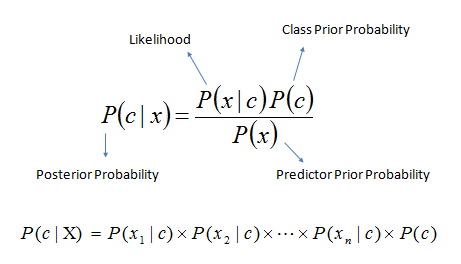

In [ ]:
# now we need to calculate the likelihood P(X| Buys Computer: Yes). Here X is the multiplications of features of the independent variables given Buys Computer: Yes 
def P(x_class, y_class):
  yes_count = df[df[y_class] == 1].shape[0]
  x_yes_count = df[(df[x_class] == 1) & (df[y_class] == 1)].shape[0]
  P_X_given_yes = x_yes_count / yes_count
  return P_X_given_yes

In [ ]:
likelihood = P('Age<30','Buy Computer') * P('M_Income','Buy Computer') * P('Is Student','Buy Computer') * P('Fair CR','Buy Computer')
print(likelihood)

0.013888888888888888


In [ ]:
predictor_prior = prior('Age<30')[1] * prior('M_Income')[1] * prior('Is Student')[1] * prior('Fair CR')[1]
print(predictor_prior)

KeyError: ignored

In [ ]:
posterior_probability = (likelihood * p_buysComputer['Yes'] ) 
print(posterior_probability)

0.000272162693172902


**What if you consider the Age as numerical value instead of categorical range ?**

In [ ]:
df = pd.read_csv("sample_nb.csv")
df

,Sl,Age,Income,Student,Credit Rating,Buys Computer
0,1,35,Medium,Yes,Fair,Yes
1,2,30,High,No,Average,No
2,3,40,Low,Yes,Good,No
3,4,35,Medium,No,Fair,Yes
4,5,45,Low,No,Fair,Yes
5,6,35,High,No,Excellent,Yes
6,7,35,Medium,No,Good,No
7,8,25,Low,No,Good,Yes
8,9,28,High,No,Average,No
9,10,35,Medium,Yes,Average,Yes


In [ ]:
prior_prob = prior('Buys Computer')
print(prior_prob)

Yes    0.6
No     0.4
Name: Buys Computer, dtype: float64


In [ ]:
# now we need to calculate the likelihood P(X| Buys Computer: Yes). Here X is the multiplications of features of the independent variables given Buys Computer: Yes 
def P(x_class, x_value, y_class, y_value):
  yes_count = df[df[y_class] == y_value].shape[0]
  x_yes_count = df[(df[x_class] == x_value) & (df[y_class] == y_value)].shape[0]
  P_X_given_yes = x_yes_count / yes_count
  return P_X_given_yes

#In Gaussion Distribution we need a different method so that we can calculate the numerical value to categorical counterparts 
def mean(x_class, y_class, y_value):
  filtered_df = df.loc[df[y_class] == y_value]
  result = filtered_df[x_class].sum() / df[df[y_class] == y_value].shape[0]
  return result

def sd(x_class, y_class, y_value):
  m = mean(x_class, y_class, y_value)
  filtered_df = df.loc[df[y_class] == y_value]
  filtered_df[x_class] = (filtered_df[x_class] - m) ** 2

  sum = filtered_df[x_class].sum()
  result = sum / (df[df[y_class] == y_value].shape[0] - 1)
  return math.sqrt(result)

def P_num(x_class, x_value, y_class, y_value):
  s = sd(x_class, y_class, y_value)
  print('SD', s)
  m = mean(x_class, y_class, y_value)
  print('Mean', m)
  e = -1*math.pow(float(x_value)-m,2)/(2 * math.pow(s,2))
  print('e', e)
  result = 1 / (s*math.sqrt(2*math.pi))
  result = math.exp(e)*result
  return result



In [ ]:
likelihood = P_num('Age', '21', 'Buys Computer', 'Yes') * P('Income','Medium','Buys Computer','Yes') * P('Student','Yes','Buys Computer','Yes') * P('Credit Rating','Fair','Buys Computer','Yes')
print('Likelihood', likelihood)

SD 6.324555320336759
Mean 35.0
e -2.4499999999999997
Likelihood 0.00045360448862150337


<ipython-input-26-9dc8e51590fc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[x_class] = (filtered_df[x_class] - m) ** 2


In [ ]:
posterior_probability = likelihood * prior_prob['Yes'] / predictor_prior
print(posterior_probability)

0.03780037405179194


**Using Sklearn to E-Mail classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#For model creation and training
from sklearn.naive_bayes import MultinomialNB

#For model evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
file_train = 'SMS_train.csv'
file_test = 'SMS_test.csv'

df_train = pd.read_csv(file_train, encoding = 'cp1252')
df_test = pd.read_csv(file_test, encoding = 'cp1252')

In [ ]:
print(df_train.head())
print(df_train.shape)

   S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam
(957, 3)


In [ ]:
print(df_test.head())
print(df_test.shape)

   S. No.                                       Message_body Label
0       1  UpgrdCentre Orange customer, you may now claim...  Spam
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam
3       4  URGENT! Your Mobile number has been awarded wi...  Spam
4       5  Someone has contacted our dating service and e...  Spam
(125, 3)


In [ ]:
df_train['y'] = pd.Categorical(df_train['Label']).codes
print(df_train.head())
print(df_train.shape)

   S. No.                                       Message_body     Label  y
0       1                         Rofl. Its true to its name  Non-Spam  0
1       2  The guy did some bitching but I acted like i'd...  Non-Spam  0
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam  0
3       4               Will ü b going to esplanade fr home?  Non-Spam  0
4       5  This is the 2nd time we have tried 2 contact u...      Spam  1
(957, 4)


In [ ]:
df_test['y'] = pd.Categorical(df_test['Label']).codes
print(df_test.head())
print(df_test.shape)

   S. No.                                       Message_body Label  y
0       1  UpgrdCentre Orange customer, you may now claim...  Spam  1
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam  1
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam  1
3       4  URGENT! Your Mobile number has been awarded wi...  Spam  1
4       5  Someone has contacted our dating service and e...  Spam  1
(125, 4)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        125 non-null    int64 
 1   Message_body  125 non-null    object
 2   Label         125 non-null    object
 3   y             125 non-null    int8  
dtypes: int64(1), int8(1), object(2)
memory usage: 3.2+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


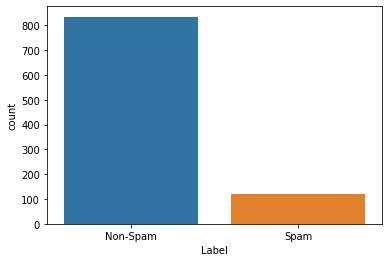

In [ ]:
sns.countplot(df_train['Label'])

In [ ]:
 df = pd.concat([df_train,df_test], ignore_index=False, axis=0)
 df.shape

(1082, 4)

In [ ]:
y = df['y'].values
y.shape

(1082,)

In [ ]:
vectorizer = CountVectorizer()
spamham_countVector = vectorizer.fit_transform(df['Message_body'])
spamham_countVector.shape

(1082, 3527)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spamham_countVector, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(865, 3527)
(865,)
(217, 3527)
(217,)


In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       180
           1       0.88      0.97      0.92        37

    accuracy                           0.97       217
   macro avg       0.94      0.97      0.95       217
weighted avg       0.97      0.97      0.97       217

